In [15]:
import seaborn as sns
from __future__ import absolute_import, division, print_function, unicode_literals
import functools
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd 
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
data=pd.read_csv("train.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
def processData(dataFrame):
    dataFrame.drop(["PassengerId", "Ticket", "Name", "Cabin"], inplace=True, axis=1)
    dataFrame = dataFrame.dropna(subset=['Embarked'])
    dataFrame = dataFrame.fillna(data.mean())
    dataFrame['Sex'] = dataFrame['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
    embarked = pd.get_dummies(dataFrame['Embarked'], prefix='Embarked')
    dataFrame = dataFrame.drop('Embarked', axis=1)
    dataFrame = dataFrame.join(embarked)
    return dataFrame
data = processData(data)
data, testData = train_test_split(data, test_size=0.2)
labels = data['Survived'].values

C:\Users\renan\AppData\Local\Temp/ipykernel_23652/2415891344.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataFrame = dataFrame.fillna(data.mean())


In [5]:
data.isnull().any(axis=0)

Survived      False
Pclass        False
Sex           False
Age           False
SibSp         False
Parch         False
Fare          False
Embarked_C    False
Embarked_Q    False
Embarked_S    False
dtype: bool

In [6]:
data.isnull().sum(axis=0)

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [7]:
data = data.drop(['Survived'], axis=1).values.astype(float)

In [8]:
model = Sequential()
model.add(Dense(16, input_dim=data.shape[1], kernel_initializer='uniform', activation='relu'))
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(4, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])
history = model.fit(data, labels, epochs=150, batch_size=3, verbose=1,validation_split = 0.2)

Epoch 1/150
190/190 [==============================] - 1s 2ms/step - loss: 0.6846 - binary_accuracy: 0.6144 - val_loss: 0.6584 - val_binary_accuracy: 0.6154
Epoch 2/150
190/190 [==============================] - 0s 1ms/step - loss: 0.6455 - binary_accuracy: 0.6144 - val_loss: 0.6129 - val_binary_accuracy: 0.6154
Epoch 3/150
190/190 [==============================] - 0s 1ms/step - loss: 0.6257 - binary_accuracy: 0.6532 - val_loss: 0.5867 - val_binary_accuracy: 0.7133
Epoch 4/150
190/190 [==============================] - 0s 1ms/step - loss: 0.6097 - binary_accuracy: 0.6620 - val_loss: 0.5620 - val_binary_accuracy: 0.7203
Epoch 5/150
190/190 [==============================] - 0s 1ms/step - loss: 0.6006 - binary_accuracy: 0.6602 - val_loss: 0.5499 - val_binary_accuracy: 0.7343
Epoch 6/150
190/190 [==============================] - 0s 1ms/step - loss: 0.5937 - binary_accuracy: 0.6673 - val_loss: 0.5423 - val_binary_accuracy: 0.7203
Epoch 7/150
190/190 [==============================] - 0s 

Epoch 53/150
190/190 [==============================] - 0s 1ms/step - loss: 0.4505 - binary_accuracy: 0.7905 - val_loss: 0.4510 - val_binary_accuracy: 0.7692
Epoch 54/150
190/190 [==============================] - 0s 1ms/step - loss: 0.4461 - binary_accuracy: 0.8011 - val_loss: 0.4426 - val_binary_accuracy: 0.7972
Epoch 55/150
190/190 [==============================] - 0s 1ms/step - loss: 0.4422 - binary_accuracy: 0.8099 - val_loss: 0.4492 - val_binary_accuracy: 0.7762
Epoch 56/150
190/190 [==============================] - 0s 1ms/step - loss: 0.4494 - binary_accuracy: 0.7923 - val_loss: 0.4552 - val_binary_accuracy: 0.7832
Epoch 57/150
190/190 [==============================] - 0s 1ms/step - loss: 0.4426 - binary_accuracy: 0.7993 - val_loss: 0.4465 - val_binary_accuracy: 0.7692
Epoch 58/150
190/190 [==============================] - 0s 1ms/step - loss: 0.4440 - binary_accuracy: 0.7993 - val_loss: 0.4320 - val_binary_accuracy: 0.7832
Epoch 59/150
190/190 [==============================

Epoch 105/150
190/190 [==============================] - 0s 1ms/step - loss: 0.4305 - binary_accuracy: 0.8151 - val_loss: 0.4354 - val_binary_accuracy: 0.8112
Epoch 106/150
190/190 [==============================] - 0s 1ms/step - loss: 0.4256 - binary_accuracy: 0.8046 - val_loss: 0.4386 - val_binary_accuracy: 0.7972
Epoch 107/150
190/190 [==============================] - 0s 1ms/step - loss: 0.4354 - binary_accuracy: 0.8099 - val_loss: 0.4926 - val_binary_accuracy: 0.7692
Epoch 108/150
190/190 [==============================] - 0s 1ms/step - loss: 0.4394 - binary_accuracy: 0.8116 - val_loss: 0.4451 - val_binary_accuracy: 0.7832
Epoch 109/150
190/190 [==============================] - 0s 2ms/step - loss: 0.4370 - binary_accuracy: 0.8063 - val_loss: 0.4563 - val_binary_accuracy: 0.7762
Epoch 110/150
190/190 [==============================] - 0s 1ms/step - loss: 0.4301 - binary_accuracy: 0.8187 - val_loss: 0.4318 - val_binary_accuracy: 0.8042
Epoch 111/150
190/190 [=======================

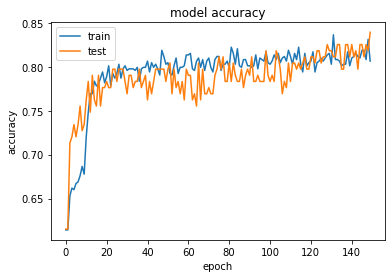

In [9]:
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

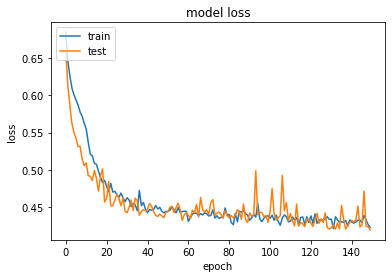

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [11]:
def print_confusion_matrix(confusion_matrix, axes, class_label, class_names, fontsize=14):

    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )

    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cbar=False, ax=axes)
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    axes.set_ylabel('True label')
    axes.set_xlabel('Predicted label')
    axes.set_title("Confusion Matrix for the class - " + class_label)


In [12]:
testLabels = testData['Survived'].values
testData = testData.drop(['Survived'], axis=1).values.astype(float)
test_results = model.evaluate(testData, testLabels, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

6/6 [==============================] - 0s 1ms/step - loss: 0.3783 - binary_accuracy: 0.8483
Test results - Loss: 0.3782860338687897 - Accuracy: 0.8483145833015442%


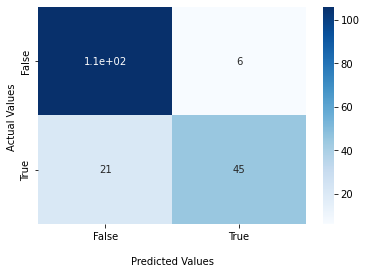

In [19]:

predLabels = (model.predict(testData)>0.5)
matrix = confusion_matrix(testLabels, predLabels)

ax = sns.heatmap(matrix, annot=True, cmap='Blues')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()